# Import Libraries, Compute Custom Risk, Replace NaN values with zeros, Standardize percentiles for risk values

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import rankdata

In [11]:
ne_data = pd.read_csv("CIVE202_Spring2025_GroupP_Project4_CleanedNebraska.csv")

print(ne_data.isna())

      OID_  NRI_ID  STATE  STATEABBRV  STATEFIPS  COUNTY  COUNTYTYPE  \
0    False   False  False       False      False   False       False   
1    False   False  False       False      False   False       False   
2    False   False  False       False      False   False       False   
3    False   False  False       False      False   False       False   
4    False   False  False       False      False   False       False   
..     ...     ...    ...         ...        ...     ...         ...   
548  False   False  False       False      False   False       False   
549  False   False  False       False      False   False       False   
550  False   False  False       False      False   False       False   
551  False   False  False       False      False   False       False   
552  False   False  False       False      False   False       False   

     COUNTYFIPS  STCOFIPS  TRACT  ...  WNTW_EALS  WNTW_EALR  WNTW_ALRB  \
0         False     False  False  ...      False      False  

In [5]:
ia_data = pd.read_csv("CIVE202_Spring2025_GroupP_Project4_CleanedIowa.csv")

print(ia_data.isna())

      OID_  NRI_ID  STATE  STATEABBRV  STATEFIPS  COUNTY  COUNTYTYPE  \
0    False   False  False       False      False   False       False   
1    False   False  False       False      False   False       False   
2    False   False  False       False      False   False       False   
3    False   False  False       False      False   False       False   
4    False   False  False       False      False   False       False   
..     ...     ...    ...         ...        ...     ...         ...   
891  False   False  False       False      False   False       False   
892  False   False  False       False      False   False       False   
893  False   False  False       False      False   False       False   
894  False   False  False       False      False   False       False   
895  False   False  False       False      False   False       False   

     COUNTYFIPS  STCOFIPS  TRACT  ...  WNTW_EALS  WNTW_EALR  WNTW_ALRB  \
0         False     False  False  ...      False      False  

In [6]:
ne_data.fillna(0, inplace=True)
ia_data.fillna(0, inplace=True)


In [70]:
#percentile the Social Vulnerability and Community Resilience score to be used
ne_data['SOVI_SCORE'] = rankdata(ne_data['SOVI_SCORE'], method='average') / len(ne_data)
ne_data['RESL_SCORE'] = rankdata(ne_data['RESL_SCORE'], method='average') / len(ne_data)

# Save the updated DataFrame to a new CSV and new data frame
ne_data.to_csv('CleanedNebraska_percentile.csv', mode='a', index=False)
ne_data_percentile = pd.read_csv("CleanedNebraska_percentile.csv")

In [72]:
#Same with Iowa
ia_data['SOVI_SCORE'] = rankdata(ia_data['SOVI_SCORE'], method='average') / len(ia_data)
ia_data['RESL_SCORE'] = rankdata(ia_data['RESL_SCORE'], method='average') / len(ia_data)

# Save the updated DataFrame to a new CSV and new data frame
ia_data.to_csv('CleanedIowa_percentile.csv', mode='a', index=False)
ia_data_percentile = pd.read_csv("CleanedIowa_percentile.csv")

In [73]:
def compute_custom_risk(df):
    df = df.copy()
    df["CUSTOM_RISK"] = df["EAL_SCORE"] * (1 + df["SOVI_SCORE"] - df["RESL_SCORE"])
    return df


ne_data_percentile = compute_custom_risk(ne_data_percentile)
ia_data_percentile = compute_custom_risk(ia_data_percentile)


# Nebraska Custom Risk

In [74]:
# FEMA official risk score vs our custom definition
print("Top 10 Nebraska Tracts - FEMA Risk Score")
print(ne_data_percentile.nlargest(10, "RISK_SCORE")[["COUNTY", "TRACT", "RISK_SCORE"]])

print("\nTop 10 Nebraska Tracts - Custom Risk Score")
print(ne_data_percentile.nlargest(10, "CUSTOM_RISK")[["COUNTY", "TRACT", "CUSTOM_RISK"]])


Top 10 Nebraska Tracts - FEMA Risk Score
      COUNTY   TRACT  RISK_SCORE
260   Furnas  963900   99.204443
434   Phelps  967200   98.879798
305  Kearney  966600   98.689531
290   Harlan  964200   98.586072
547  Webster  965100   98.231699
72    Dawson  968000   97.968891
532   Thayer  963100   97.594301
47     Chase  961900   97.589545
54      Clay  962200   97.440898
53      Clay  962100   97.436141

Top 10 Nebraska Tracts - Custom Risk Score
       COUNTY   TRACT  CUSTOM_RISK
57     Colfax  964800   171.719868
76     Dawson  968400   166.976890
47      Chase  961900   164.194215
535  Thurston  940100   162.129692
455    Saline  960602   161.389226
419   Morrill  952500   159.888072
290    Harlan  964200   156.096564
77     Dawson  968500   154.924555
72     Dawson  968000   152.324084
536  Thurston  940200   151.114473


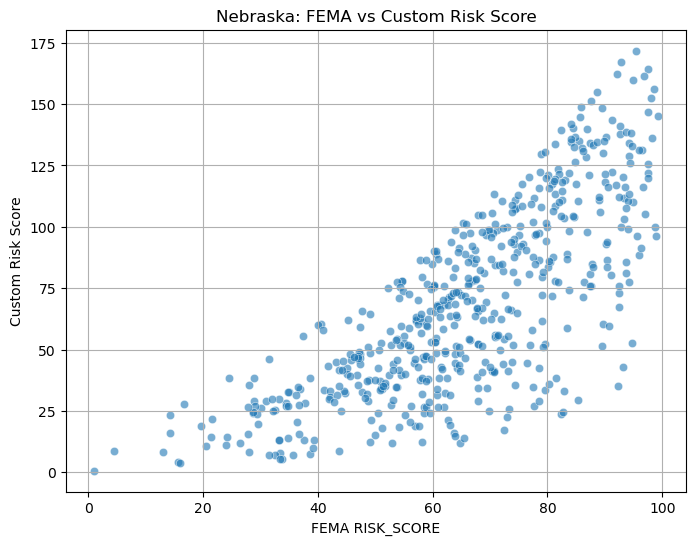

In [75]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="RISK_SCORE", y="CUSTOM_RISK", data=ne_data_percentile, alpha=0.6)
plt.title("Nebraska: FEMA vs Custom Risk Score")
plt.xlabel("FEMA RISK_SCORE")
plt.ylabel("Custom Risk Score")
plt.grid(True)
plt.show()


In [76]:
ne_data.to_csv("Nebraska_Final_CustomRisk.csv", index=False)
ia_data.to_csv("Iowa_Final_CustomRisk.csv", index=False)


# Comparison of NRI County risk by our custom risk

In [84]:
Nebraska_county_risk_table = ne_data_percentile.groupby('COUNTY').agg({
    'RISK_SCORE': 'mean',           # Calculate mean of FEMA Risk for each county
    'CUSTOM_RISK': 'mean'           # Calculate mean of Custom Risk for each county
}).reset_index()

# Print the table
print(Nebraska_county_risk_table)

# Save the table to a CSV 
Nebraska_county_risk_table.to_csv('Nebraska_County_Risk_Summary.csv', index=False)

        COUNTY  RISK_SCORE  CUSTOM_RISK
0        Adams   80.061652    92.097342
1     Antelope   67.971587    89.351974
2       Arthur   37.461352    55.453409
3       Banner   49.080769    64.568081
4       Blaine   16.704324    27.984070
..         ...         ...          ...
88  Washington   75.488513    38.451864
89       Wayne   83.101841    41.615270
90     Webster   94.263426   114.832147
91     Wheeler   40.835038    57.919915
92        York   92.017671    98.999881

[93 rows x 3 columns]


# Iowa Custom Risk

In [78]:
print("Top 10 Iowa Tracts - FEMA Risk Score")
print(ia_data_percentile.nlargest(10, "RISK_SCORE")[["COUNTY", "TRACT", "RISK_SCORE"]])

print("\nTop 10 Iowa Tracts - Custom Risk Score")
print(ia_data_percentile.nlargest(10, "CUSTOM_RISK")[["COUNTY", "TRACT", "CUSTOM_RISK"]])

Top 10 Iowa Tracts - FEMA Risk Score
       COUNTY   TRACT  RISK_SCORE
436      Linn    2700   99.191362
335   Johnson     200   98.361319
441      Linn    3005   97.377872
356   Johnson    2100   96.843933
366   Johnson   10401   96.275508
440      Linn    3004   95.717785
166  Crawford   70401   95.149360
430      Linn    1900   95.000714
524   O'Brien  490200   94.872283
360   Johnson   10303   94.846121

Top 10 Iowa Tracts - Custom Risk Score
        COUNTY   TRACT  CUSTOM_RISK
166   Crawford   70401   178.419500
167   Crawford   70402   174.439639
189      Davis   80200   167.644298
453     Louisa  450200   163.853670
137     Clarke  960100   159.012360
188      Davis   80100   158.621834
527    Osceola  460100   158.054388
802  Van Buren  950100   148.789762
452     Louisa  450100   147.120511
191    Decatur  960200   146.831566


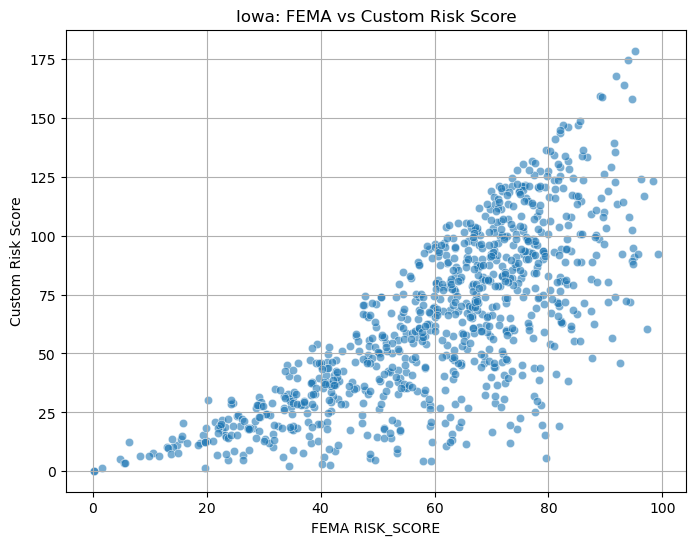

In [79]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="RISK_SCORE", y="CUSTOM_RISK", data=ia_data_percentile, alpha=0.6)
plt.title("Iowa: FEMA vs Custom Risk Score")
plt.xlabel("FEMA RISK_SCORE")
plt.ylabel("Custom Risk Score")
plt.grid(True)
plt.show()


# Iowa Table by County comparing our risk value to the NRI's risk value

In [85]:
Iowa_county_risk_table = ia_data_percentile.groupby('COUNTY').agg({
    'RISK_SCORE': 'mean',           # Calculate mean of FEMA Risk for each county
    'CUSTOM_RISK': 'mean'           # Calculate mean of Custom Risk for each county
}).reset_index()

# Print the table
print(Iowa_county_risk_table)

# Save the table to a CSV 
county_risk_table.to_csv('Iowa_County_Risk_Summary.csv', index=False)

        COUNTY  RISK_SCORE  CUSTOM_RISK
0        Adair   79.410645   113.986532
1        Adams   76.185606   109.963703
2    Allamakee   53.491890    82.609324
3    Appanoose   68.889550   112.181118
4      Audubon   74.454169    77.519934
..         ...         ...          ...
94   Winnebago   75.232285    96.971473
95  Winneshiek   71.467678    52.687141
96    Woodbury   60.717982    67.894201
97       Worth   71.778925    88.782590
98      Wright   67.914427   100.906727

[99 rows x 3 columns]
